In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("driver_imgs_list.csv")
df1 = pd.read_csv("sample_submission.csv")

In [3]:
df

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [4]:
import os
import cv2
import numpy as np

# function to load the images from train folder which has all classes images in their respective name folder (c0, c1, c2 .....)

def load_images(folder_path):
    images = []
    labels = []
    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if os.path.isdir(folder):
            label = int(folder_name[1:])
            for image_file in os.listdir(folder):
                image_path = os.path.join(folder, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)


In [5]:
images, labels = load_images('imgs/train')

In [6]:
images.shape

(22424, 224, 224, 3)

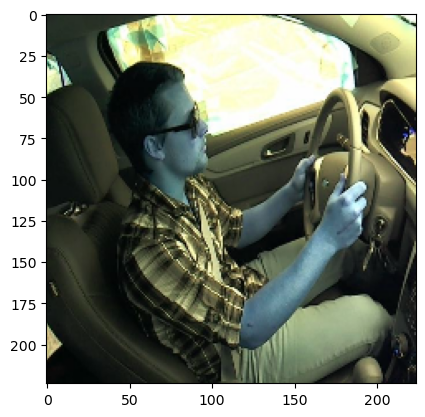

0


In [18]:
plt.imshow(images[42])
plt.show()
print(labels[42])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [24]:
# CNN model for training using sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 227s 402ms/step - accuracy: 0.7136 - loss: 35.7522 - val_accuracy: 0.9795 - val_loss: 0.0681
Epoch 2/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 225s 402ms/step - accuracy: 0.9860 - loss: 0.0488 - val_accuracy: 0.9799 - val_loss: 0.0783
Epoch 3/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 230s 409ms/step - accuracy: 0.9845 - loss: 0.0543 - val_accuracy: 0.9757 - val_loss: 0.0856
Epoch 4/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 225s 402ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9891 - val_loss: 0.0383
Epoch 5/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 225s 402ms/step - accuracy: 0.9977 - loss: 0.0096 - val_accuracy: 0.9886 - val_loss: 0.0417
141/141 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9874 - loss: 0.0463
Test accuracy: 0.9886287450790405


In [48]:
print(f'Test Accuracy: {test_acc*100:.2f} %')

Test Accuracy: 98.86 %


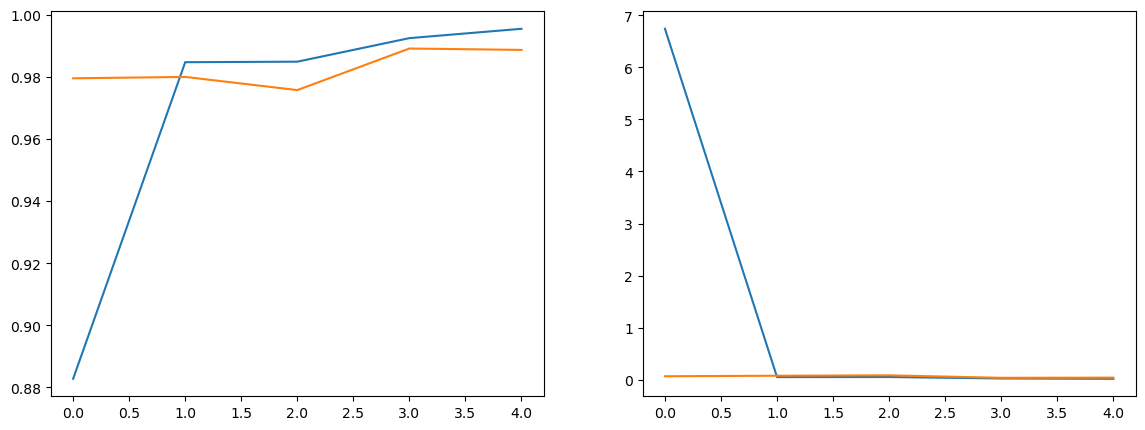

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')



In [28]:
import os
import cv2
import numpy as np
import csv

# Function for loading the images of test folder

def load_test_images(test_folder_path):
    test_images = []
    image_names = []
    for image_file in os.listdir(test_folder_path):
        image_path = os.path.join(test_folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))
        test_images.append(image)
        image_names.append(image_file)
    return np.array(test_images), image_names

test_images, image_names = load_test_images('imgs/test')


In [29]:
# Predictions made by model on test images and saving them in 'predictions_driver.csv' with class probabilities

predictions = model.predict(test_images)

csv_file_path = 'predictions_driver.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['Image Name', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

    for i in range(len(test_images)):
        row = [image_names[i]] + list(predictions[i])
        writer.writerow(row)

print("Predictions saved to:", csv_file_path)

2492/2492 ━━━━━━━━━━━━━━━━━━━━ 254s 101ms/step
Predictions saved to: predictions_driver.csv


In [51]:
# Reading the just saved csv

x = pd.read_csv(r'predictions_driver.csv')

x.head()

,Image Name,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,5.682488e-14,7.052489e-15,4.673698e-14,4.934363e-12,1.603463e-12,9.999999e-01,3.950451e-13,4.587276e-08,1.381234e-07,6.018643e-09
1,img_10.jpg,3.124274e-11,1.748315e-12,9.999844e-01,8.175130e-08,1.533523e-05,1.635981e-07,9.258092e-11,8.059103e-09,1.390803e-12,8.931680e-13
2,img_100.jpg,1.711801e-02,1.074621e-02,6.870372e-03,1.225346e-04,1.526101e-05,3.034634e-03,2.511657e-02,7.994441e-03,8.629133e-01,6.606872e-02
3,img_1000.jpg,2.175836e-04,5.492632e-05,7.163958e-06,2.864819e-08,1.714841e-05,1.567939e-08,4.611023e-03,7.345642e-04,9.942279e-01,1.295677e-04
4,img_100000.jpg,9.209408e-08,4.182880e-10,1.731327e-08,3.495474e-06,1.141676e-06,1.706264e-07,2.645058e-05,3.847263e-06,9.999556e-01,9.033410e-06


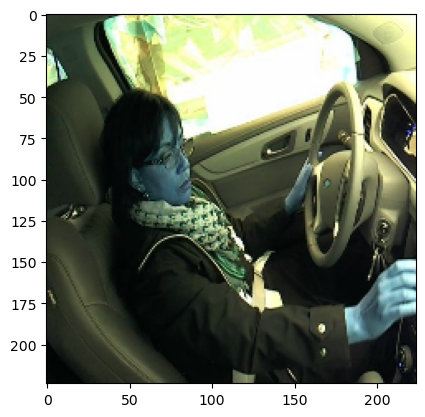

c5


In [53]:
# Checking the predicted probability for class , of 1st row image in above saved csv

index = image_names.index('img_1.jpg')                      
max_pred_index = np.argmax(predictions[index])              # c1: texting - right    
                                                            # c2: talking on the phone - right
plt.imshow(test_images[index])                              # c3: texting - left
plt.show()                                                  # c4: talking on the phone - left
                                                            # c5: operating the radio
print(f'c{max_pred_index}')                                 # c6: drinking
                                                            # c7: reaching behind
                                                            # c8: hair and makeup
                                                            # c9: talking to passenger   

In [30]:
# saving the model

model.save('driver_classification_model.h5')